<div class="output_png output_subarea output_execute_result">
<center>
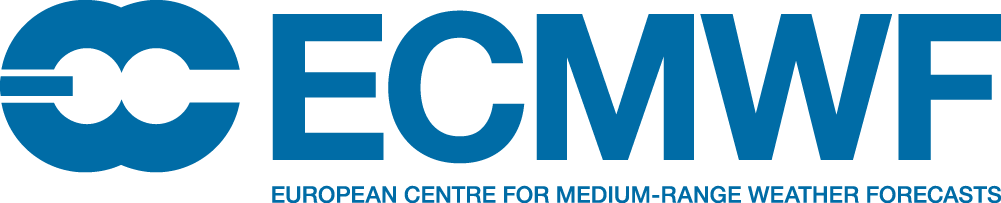</center>
</div>

# 	Total accumulated precipitation

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-rain-acc  

Access to ECMWF Open data is governed by the following [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).    

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input parameter:

* [Total precipitation](https://apps.ecmwf.int/codes/grib/param-db/?id=228)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> Skip this cell if you already have these libraries installed
</div>

In [1]:
import sys
!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

  Cloning https://github.com/ecmwf/ecmwf-geomaps.git to /tmp/pip-req-build-fbggefwn
  Running command git clone --filter=blob:none -q https://github.com/ecmwf/ecmwf-geomaps.git /tmp/pip-req-build-fbggefwn
  Resolved https://github.com/ecmwf/ecmwf-geomaps.git to commit a75e2c8063a57c6fa0e72d700f0d1e901286b56c
  Preparing metadata (setup.py) ... done


In [1]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("https://ai4edataeuwest.blob.core.windows.net/ecmwf", beta=True)

In [3]:
parameters = ['tp']
filename = 'medium-rain-acc.grib'
filename

'medium-rain-acc.grib'

In [4]:
client.retrieve(
    date=-2,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters,
    target=filename
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [5]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tp,surface,0,20220103,0,12,None,228228,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [7]:
data.describe('tp')

shortName,tp
name,Total Precipitation
paramId,228228
units,kg m**-2
typeOfLevel,surface
level,0
date,20220103
time,0
step,12
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20220103,0,12,fc,None,regular_ll


And finally, we can plot the data on the map. 

Magics-warning: description is not a known keyword


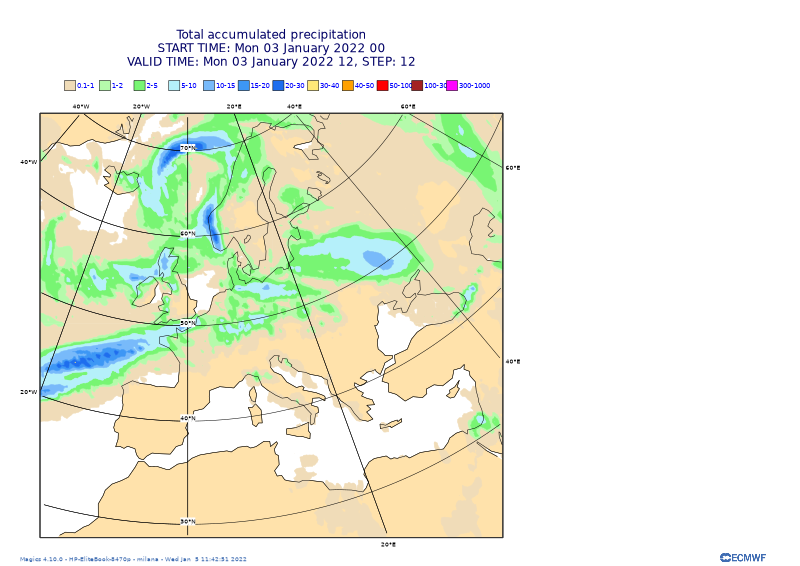

In [9]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(data, preset="accumulated_tp_3")

fig.title(["Total accumulated precipitation", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp'/>, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.show()